In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
import seaborn as sns

#loading the dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#cleaning up the data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [42]:
df_DA_ind = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')]
df_DA_ind


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc","[sql, python, databricks, power bi, excel, wor...","{'analyst_tools': ['power bi', 'excel', 'word'..."
123,Data Analyst,Data Analytics work from home job/internship a...,Anywhere,via LinkedIn,Part-time,True,India,2023-03-07 13:37:56,False,False,India,None,NaN,NaN,Inoket Solutions Private Limited,"[sql, excel, word, powerpoint, outlook, power bi]","{'analyst_tools': ['excel', 'word', 'powerpoin..."
159,Data Analyst,Data Analyst,"Hyderabad, Telangana, India",via LinkedIn,Contractor,False,India,2023-11-28 13:12:07,False,False,India,None,NaN,NaN,Fusion Plus Solutions Inc,[sql],{'programming': ['sql']}
171,Data Analyst,Data Base work from home job/internship at Mga...,Anywhere,via LinkedIn,Full-time,True,India,2023-01-14 13:11:58,False,False,India,None,NaN,NaN,Mgadz Inc,"[sas, sas, sql]","{'analyst_tools': ['sas'], 'programming': ['sa..."
194,Data Analyst,Data Analyst,India,via BeBee India,Full-time,False,India,2023-06-20 13:11:10,False,False,India,None,NaN,NaN,QuEST Global Services Pte. Ltd,"[python, sql, excel, ms access, powerpoint]","{'analyst_tools': ['excel', 'ms access', 'powe..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785517,Data Analyst,Analyst - Data Analytics/SQL (2-9 yrs),"Gurugram, Haryana, India",via BeBee India,Full-time,False,India,2023-10-16 06:10:56,False,False,India,None,NaN,NaN,iimjobs,[power bi],{'analyst_tools': ['power bi']}
785548,Data Analyst,Data Analyst,"Bengaluru, Karnataka, India",via LinkedIn,Full-time,False,India,2023-01-19 06:14:17,False,False,India,None,NaN,NaN,Artech L.L.C.,"[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
785628,Data Analyst,Data Analyst,"Gurugram, Haryana, India",via LinkedIn,Full-time,False,India,2023-01-09 06:08:12,False,False,India,None,NaN,NaN,GUS Global Services India Pvt. Ltd.,"[r, python, sql, sap, power bi, tableau, excel]","{'analyst_tools': ['sap', 'power bi', 'tableau..."
785691,Data Analyst,Business Intelligence Engineer,"Chennai, Tamil Nadu, India",via LinkedIn,Full-time,False,India,2023-01-23 06:12:09,False,False,India,None,NaN,NaN,Mobile Programming LLC,"[sql, python, shell, sql server, tableau, micr...","{'analyst_tools': ['tableau', 'microstrategy']..."


In [23]:
df_job_locations = df_DA_ind['job_location'].value_counts().head(11).to_frame()
df_job_locations

,count
job_location,
India,2056
"Hyderabad, Telangana, India",1289
Anywhere,1052
"Bengaluru, Karnataka, India",355
"Maharashtra, India",203
"Mumbai, Maharashtra, India",133
"Pune, Maharashtra, India",119
"Gurugram, Haryana, India",108
"Chennai, Tamil Nadu, India",106


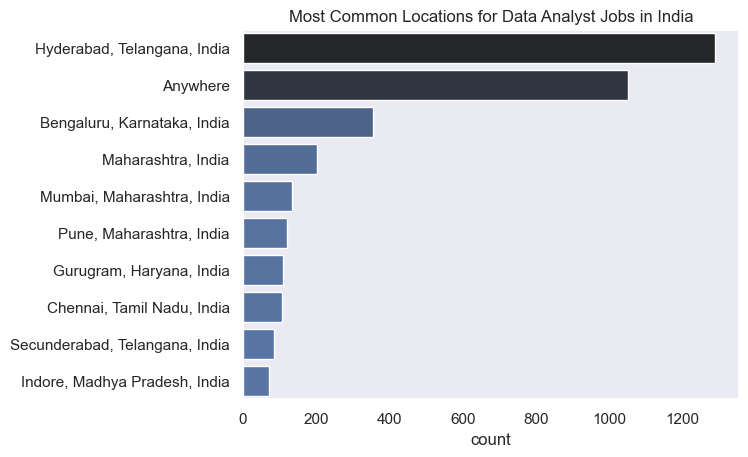

In [41]:
df_job_locations = df_job_locations[df_job_locations['count'] < 2056]
sns.set_style('dark')
sns.barplot(df_job_locations,x = 'count', y = 'job_location',hue='count',palette='dark:b_r')
plt.ylabel('')
plt.title('Most Common Locations for Data Analyst Jobs in India')
plt.legend().remove()
plt.show()

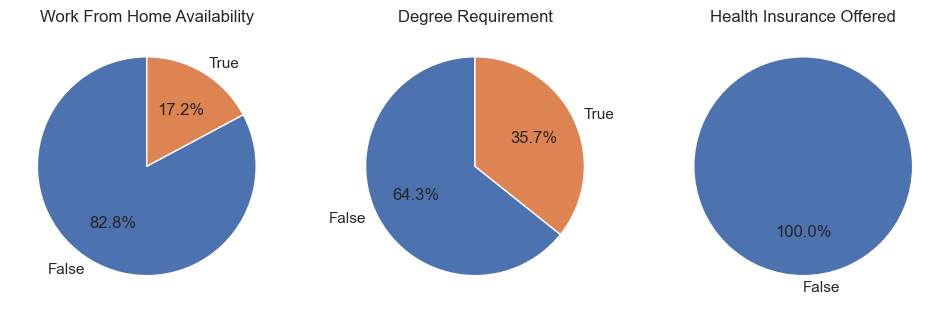

In [63]:
dict = {
    "job_work_from_home" : "Work From Home Availability",
 "job_no_degree_mention" : "Degree Requirement",
 "job_health_insurance" : "Health Insurance Offered"
 }
fig,  ax = plt.subplots(1,3)
fig.set_size_inches((12,5))

for i, (column, title) in enumerate(dict.items()):
    counts = df_DA_ind[column].value_counts()
    ax[i].pie(counts, labels=counts.index.astype(str), autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()
    

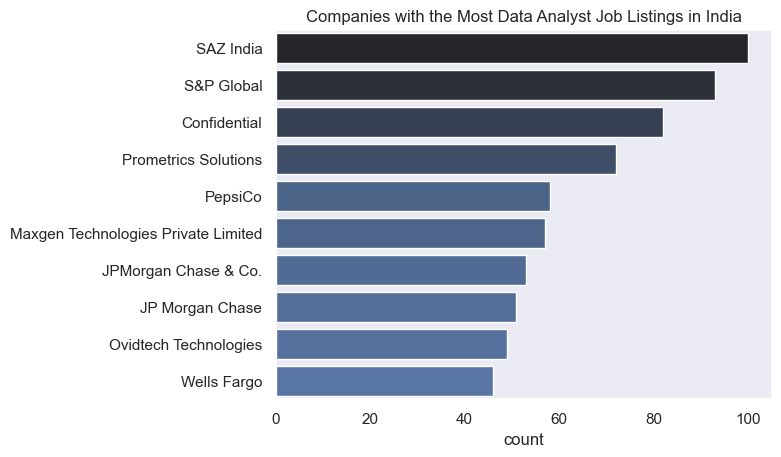

In [ ]:
df_companies = df_DA_ind['company_name'].value_counts().head(10).to_frame()
sns.set_style('dark')
sns.barplot(df_companies,x = 'count', y = 'company_name',hue='count',palette='dark:b_r')
plt.ylabel('')
plt.title('Companies with the Most Data Analyst Job Listings in India')
plt.legend().remove()
plt.show()